In [2]:
# changin colorspaces
import cv2
import numpy as np

In [3]:
# track color that we use in HSV space
red = np.uint8([[[0,0,255]]])
print(red.shape)
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print(hsv_red)

(1, 1, 3)
[[[  0 255 255]]]


In [4]:
# object tracking based on object space range
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

In [4]:
# geometric transformations of images
## scaling
img1 = cv2.imread('../data/messi5.jpg')
res = cv2.resize(img1,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('../data/messi5_scaling.jpg', res)
print(img1.shape, res.shape)

(342, 548, 3) (684, 1096, 3)


In [4]:
## scaling
height, width = img1.shape[:2]
res = cv2.resize(img1, (2*width,2*height), interpolation = cv2.INTER_CUBIC)
print(res.shape)

(684, 1096, 3)


In [5]:
# translation
rows,cols,channes = img1.shape
M = np.float32([[1,0,-100],[0,1,50]])
dst = cv2.warpAffine(img1, M, (cols,rows))

cv2.imwrite('../data/messi5_translation.jpg', dst)

True

In [6]:
#rotate
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),360,1)
dst = cv2.warpAffine(img1,M,(cols,rows))
cv2.imwrite('../data/messi5_rotation.jpg',dst)

True

In [7]:
#rotate
dst = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imwrite('../data/messi5_rotation.jpg',dst)

True

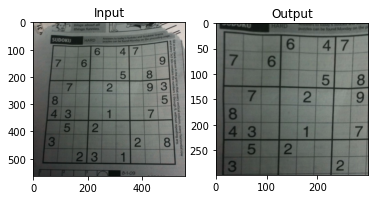

In [8]:
from matplotlib import pyplot as plt
img2 = cv2.imread('../data/sudoku.png')
rows,cols,ch = img2.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[250,0],[0,250],[250,250]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img2,M,(300,300))
plt.subplot(121),plt.imshow(img2),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

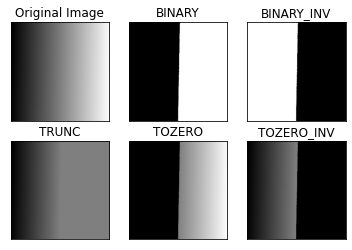

In [9]:
from matplotlib import pyplot as plt

img = cv2.imread('../data/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

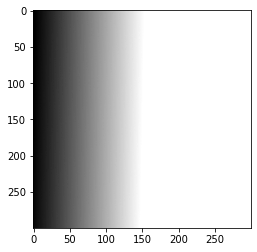

In [10]:
from matplotlib import pyplot as plt

img = cv2.imread('../data/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh1,'gray')

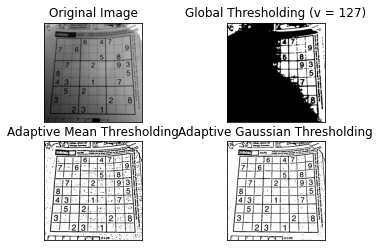

In [12]:
# adaptive thresholding
from matplotlib import pyplot as plt

img = cv2.imread('../data/sudoku.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# otsu's binarization
